# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import math


# Import API key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create base DataFrame with the randomly generated list of cities
df = pd.DataFrame({'City':cities})

#Create needed columns to store data for each city
df['Lat'] =''
df['Lng'] =''
df['Max_Temp'] =''
df['Humidity'] =''
df['Cloudiness'] =''
df['Wind_Speed'] =''
df['Country'] =''
df['Date'] =''

#Perform API call to get information for each city
base_url = 'http://api.openweathermap.org/data/2.5/weather'

#Parameter for the API call, units will be handled in Metric system
params = {'appid':wkey, 'units':'metric'}

print('Begining Data Retireval')
print('--------------------------')

#Iterate through the list of cities to retrieve their information
for i, row in df.iterrows():
    
    params['q'] = row['City']
    city=row['City']
    print(f'Processing record {i} of {len(cities)-1} | {city}')
    
    response = requests.get(base_url,params=params).json()
    #Send to sleep to avoid reaching the 60rpm limit of the API
    time.sleep(1.5)
  
    try:
        df.loc[i,'Lat']= response['coord']['lat']
        df.loc[i,'Lng']= response['coord']['lon']
        df.loc[i,'Max_Temp']= response['main']['temp_max']
        df.loc[i,'Humidity']= response['main']['humidity']
        df.loc[i,'Cloudiness']= response['clouds']['all']
        df.loc[i,'Wind_Speed']= response['wind']['speed']
        df.loc[i,'Country']= response['sys']['country']
        df.loc[i,'Date']= response['dt']
    except:
        #Assign NaN to Cities not found to be dropped from the Dataframe
        df.loc[i,['Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Country','Date']]= np.nan
        print('City not found. Skipping...')

#Drop cities which information was not found
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
print('--------------------------')
print('Data Retrieval Complete')
print('--------------------------')


Begining Data Retireval
--------------------------
Processing record 0 of 602 | belmonte
Processing record 1 of 602 | esperance
Processing record 2 of 602 | shimoda
Processing record 3 of 602 | ponta do sol
Processing record 4 of 602 | asau
Processing record 5 of 602 | kapaa
Processing record 6 of 602 | mataura
Processing record 7 of 602 | albany
Processing record 8 of 602 | san patricio
Processing record 9 of 602 | sunndalsora
Processing record 10 of 602 | charleston
Processing record 11 of 602 | aviles
Processing record 12 of 602 | douglas
Processing record 13 of 602 | ribeira grande
Processing record 14 of 602 | rikitea
Processing record 15 of 602 | taolanaro
City not found. Skipping...
Processing record 16 of 602 | parrita
Processing record 17 of 602 | sitka
Processing record 18 of 602 | port elizabeth
Processing record 19 of 602 | kuche
City not found. Skipping...
Processing record 20 of 602 | grand river south east
City not found. Skipping...
Processing record 21 of 602 | ndele
P

City not found. Skipping...
Processing record 193 of 602 | billings
Processing record 194 of 602 | magway
Processing record 195 of 602 | kamaishi
Processing record 196 of 602 | miandrivazo
Processing record 197 of 602 | duluth
Processing record 198 of 602 | praya
Processing record 199 of 602 | kalomo
City not found. Skipping...
Processing record 200 of 602 | grindavik
Processing record 201 of 602 | alta floresta
Processing record 202 of 602 | waipawa
Processing record 203 of 602 | pisco
Processing record 204 of 602 | severo-kurilsk
Processing record 205 of 602 | taoudenni
Processing record 206 of 602 | tezu
Processing record 207 of 602 | college
Processing record 208 of 602 | tecpan
Processing record 209 of 602 | provideniya
Processing record 210 of 602 | pevek
Processing record 211 of 602 | secovce
Processing record 212 of 602 | kampot
Processing record 213 of 602 | tondano
Processing record 214 of 602 | canakkale
Processing record 215 of 602 | puri
Processing record 216 of 602 | okha

Processing record 386 of 602 | acapulco
Processing record 387 of 602 | inhambane
Processing record 388 of 602 | farmington
Processing record 389 of 602 | chandler
Processing record 390 of 602 | puerto quijarro
Processing record 391 of 602 | sambava
Processing record 392 of 602 | hailar
Processing record 393 of 602 | luderitz
Processing record 394 of 602 | kholodnyy
Processing record 395 of 602 | vao
Processing record 396 of 602 | dingle
Processing record 397 of 602 | hervey bay
Processing record 398 of 602 | upernavik
Processing record 399 of 602 | fukue
Processing record 400 of 602 | palabuhanratu
City not found. Skipping...
Processing record 401 of 602 | constantine
Processing record 402 of 602 | guerrero negro
Processing record 403 of 602 | vigrestad
Processing record 404 of 602 | ambon
Processing record 405 of 602 | fredericton
Processing record 406 of 602 | andenes
Processing record 407 of 602 | laguna de duero
Processing record 408 of 602 | pilar
Processing record 409 of 602 | gi

Processing record 580 of 602 | alyangula
Processing record 581 of 602 | harper
Processing record 582 of 602 | santa maria
Processing record 583 of 602 | abu samrah
Processing record 584 of 602 | ormara
Processing record 585 of 602 | vangaindrano
Processing record 586 of 602 | kalevala
Processing record 587 of 602 | mys shmidta
City not found. Skipping...
Processing record 588 of 602 | puerto ayacucho
Processing record 589 of 602 | labuan
Processing record 590 of 602 | sapatgram
Processing record 591 of 602 | mazagao
Processing record 592 of 602 | shenjiamen
Processing record 593 of 602 | pascagoula
Processing record 594 of 602 | xining
Processing record 595 of 602 | urumqi
Processing record 596 of 602 | pafos
Processing record 597 of 602 | changji
Processing record 598 of 602 | ijaki
City not found. Skipping...
Processing record 599 of 602 | quatre cocos
Processing record 600 of 602 | at-bashi
Processing record 601 of 602 | imbituba
Processing record 602 of 602 | kytlym
City not found.

In [4]:
#Reset Index and analyze Dataframe
df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,belmonte,-15.8631,-38.8828,26,73,20,5.14,BR,1612222261
1,esperance,-33.8667,121.9,17,77,0,4.63,AU,1612221850
2,shimoda,34.6667,138.95,14,88,75,6.69,JP,1612222265
3,ponta do sol,32.6667,-17.1,15,70,15,1.34,PT,1612222266
4,asau,46.4333,26.4,-1.67,66,79,0.2,RO,1612222268


In [5]:
#Save DataFrame to .csv file
df.to_csv(output_data_file, index=False)

In [6]:
#inspect the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        556 non-null    object
 1   Lat         556 non-null    object
 2   Lng         556 non-null    object
 3   Max_Temp    556 non-null    object
 4   Humidity    556 non-null    object
 5   Cloudiness  556 non-null    object
 6   Wind_Speed  556 non-null    object
 7   Country     556 non-null    object
 8   Date        556 non-null    object
dtypes: object(9)
memory usage: 39.2+ KB


In [15]:
#Fix Data types for numerical columns
df[['Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Date']]=df[['Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind_Speed','Date']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        556 non-null    object 
 1   Lat         556 non-null    float64
 2   Lng         556 non-null    float64
 3   Max_Temp    556 non-null    float64
 4   Humidity    556 non-null    float64
 5   Cloudiness  556 non-null    float64
 6   Wind_Speed  556 non-null    float64
 7   Country     556 non-null    object 
 8   Date        556 non-null    float64
dtypes: float64(7), object(2)
memory usage: 39.2+ KB


In [16]:
df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.275236,17.251864,9.664802,74.181655,54.057554,3.871079,1.612223e+09
std,32.372774,91.271991,17.759812,18.242246,38.919972,2.585416,2.970289e+02
min,-54.800000,-179.166700,-44.060000,1.000000,0.000000,0.200000,1.612222e+09
25%,-6.327825,-67.520825,-1.670000,66.000000,14.750000,1.870000,1.612222e+09
50%,23.922350,21.930500,15.340000,78.000000,64.000000,3.430000,1.612223e+09
75%,46.006025,103.097575,24.265000,86.250000,90.000000,5.240000,1.612223e+09
max,78.218600,179.316700,33.000000,100.000000,100.000000,14.400000,1.612223e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#No Cities in the Dataset have Humidity >100, skipping this step
df.loc[df['Humidity']>100]

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

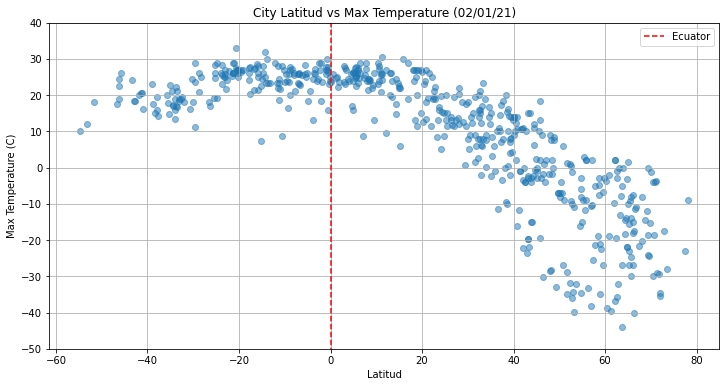

In [36]:
plt.figure(figsize=(12,6))
plt.scatter(df['Lat'],df['Max_Temp'], alpha=0.5)
plt.title('City Latitud vs Max Temperature (02/01/21)')
plt.xlabel('Latitud')
plt.ylabel('Max Temperature (C)')
plt.vlines(0,-60,60, linestyles='dashed', label ='Ecuator', colors='r')
plt.ylim(-50,40)
plt.legend()
plt.grid()

## Latitude vs. Humidity Plot

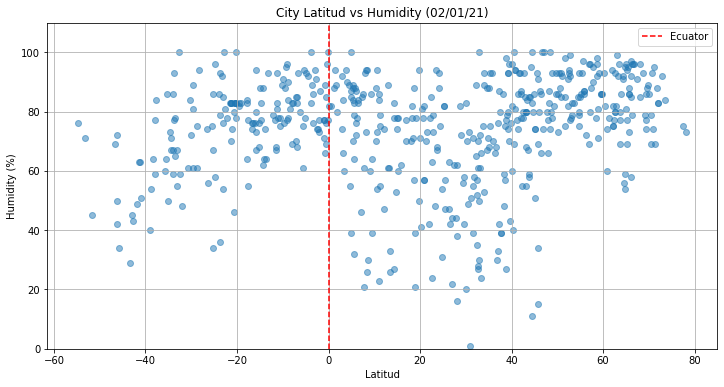

In [46]:
plt.figure(figsize=(12,6))
plt.scatter(df['Lat'],df['Humidity'], alpha=0.5)
plt.title('City Latitud vs Humidity (02/01/21)')
plt.xlabel('Latitud')
plt.ylabel('Humidity (%)')
plt.vlines(0,0,110, linestyles='dashed', label ='Ecuator', colors='r')
plt.ylim(0,110)
plt.legend()
plt.grid()

## Latitude vs. Cloudiness Plot

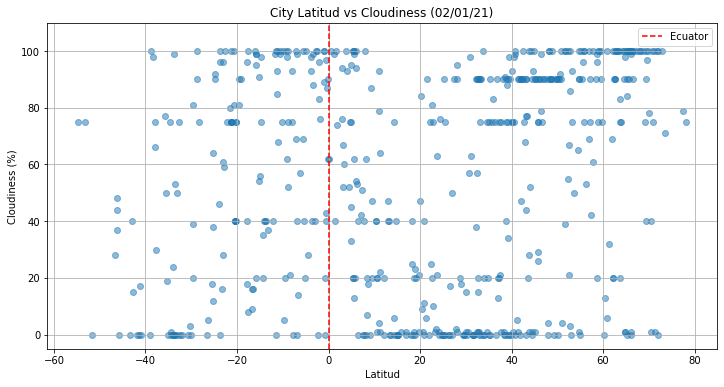

In [49]:
plt.figure(figsize=(12,6))
plt.scatter(df['Lat'],df['Cloudiness'], alpha=0.5)
plt.title('City Latitud vs Cloudiness (02/01/21)')
plt.xlabel('Latitud')
plt.ylabel('Cloudiness (%)')
plt.vlines(0,-5,110, linestyles='dashed', label ='Ecuator', colors='r')
plt.ylim(-5,110)
plt.legend()
plt.grid()

## Latitude vs. Wind Speed Plot

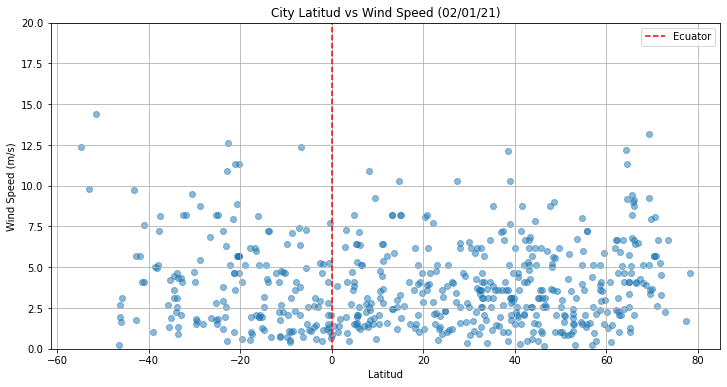

In [54]:
plt.figure(figsize=(12,6))
plt.scatter(df['Lat'],df['Wind_Speed'], alpha=0.5)
plt.title('City Latitud vs Wind Speed (02/01/21)')
plt.xlabel('Latitud')
plt.ylabel('Wind Speed (m/s)')
plt.vlines(0,-5,20, linestyles='dashed', label ='Ecuator', colors='r')
plt.ylim(0,20)
plt.legend()
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


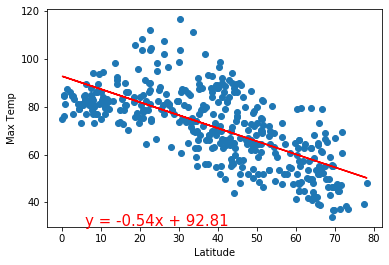

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


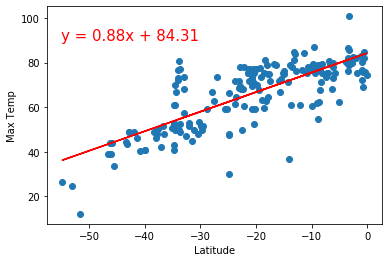

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


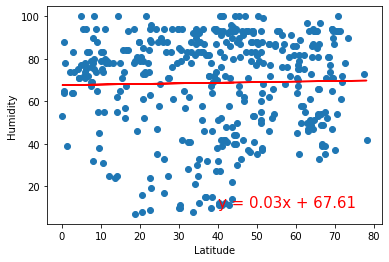

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


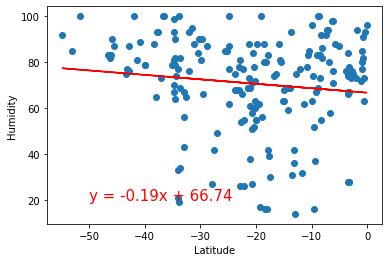

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


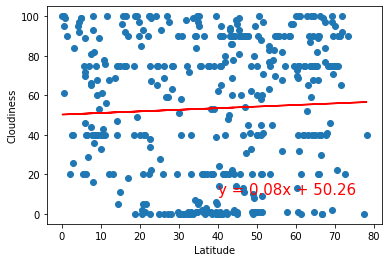

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


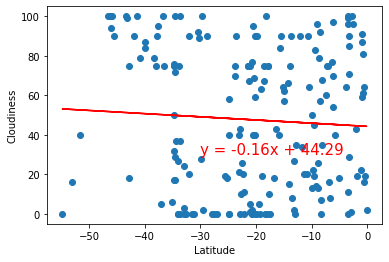

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


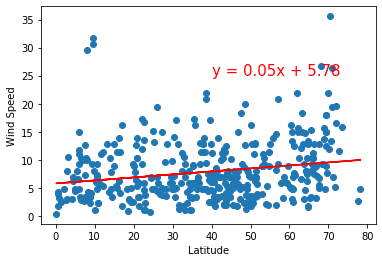

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


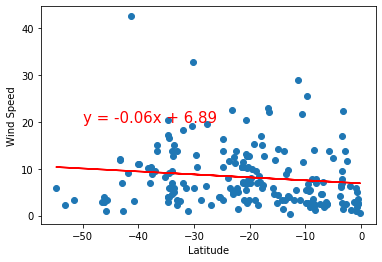